In [1]:
import pandas as pd
from sklearn import feature_selection
from feature_engine.encoding import OneHotEncoder
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn import pipeline
from sklearn import cluster
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Mariana Moledo/Documents/GitHub/tcc_mba_cd/datasets/bd_alunos_evadidos.csv",sep=';', encoding='utf-8')
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [3]:
df.dtypes

Unnamed: 0                 int64
CODALUNO                   int64
ACAOAFIRMATIVA            object
ENEMLINGUAGEM            float64
ENEMHUMANAS              float64
ENEMNATURAIS             float64
ENEMMATEMATICA           float64
ENEMREDACAO              float64
CURSO                      int64
CODTURNOINGRESSO           int64
CODTURNOATUAL              int64
TURNOATUAL                object
CR                       float64
DISCIPLINA                object
NOTADISC                   int64
RESULTDISC                 int64
PERIODODISC                int64
ANOINGRESSO                int64
SEMESTREINGRESSO           int64
ANODESVINCULACAO           int64
SEMESTREDESVINCULACAO      int64
IDADE                      int64
COR                       object
BAIRRO                    object
CEP                       object
CIDADE                    object
MOBILIDADE                 int64
CHCURSADA                  int64
ESTADOCIVIL               object
TRANCAMENTOS               int64
TEMPOPERMA

Análise Inicial

In [4]:
# Exibir as primeiras linhas do DataFrame para entender a estrutura dos dados
print(df.head())

   Unnamed: 0   CODALUNO ACAOAFIRMATIVA  ENEMLINGUAGEM  ENEMHUMANAS  \
0           0  112001032             AC          485.0        593.3   
1           1  112001035             AC          632.1        653.4   
2           2  112001037             AC          597.9        608.3   
3           3  112001039             AC          598.7        555.8   
4           4  112001048             AC          635.4        613.4   

   ENEMNATURAIS  ENEMMATEMATICA  ENEMREDACAO  CURSO  CODTURNOINGRESSO  ...  \
0         521.5           633.1        840.0      1                 8  ...   
1         564.2           662.4        640.0      1                 8  ...   
2         583.3           703.2        660.0      1                 8  ...   
3         565.9           612.3        700.0      1                 8  ...   
4         575.3           679.9        500.0      1                 8  ...   

   CHCURSADA ESTADOCIVIL  TRANCAMENTOS TEMPOPERMANENCIA  SEXO  STATUSFORMACAO  \
0       2580    SOLTEIR

In [5]:
# Verificar tipos de dados e informações gerais
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9144 entries, 0 to 9143
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9144 non-null   int64  
 1   CODALUNO               9144 non-null   int64  
 2   ACAOAFIRMATIVA         9144 non-null   object 
 3   ENEMLINGUAGEM          9144 non-null   float64
 4   ENEMHUMANAS            9144 non-null   float64
 5   ENEMNATURAIS           9144 non-null   float64
 6   ENEMMATEMATICA         9144 non-null   float64
 7   ENEMREDACAO            9144 non-null   float64
 8   CURSO                  9144 non-null   int64  
 9   CODTURNOINGRESSO       9144 non-null   int64  
 10  CODTURNOATUAL          9144 non-null   int64  
 11  TURNOATUAL             9130 non-null   object 
 12  CR                     9144 non-null   float64
 13  DISCIPLINA             9144 non-null   object 
 14  NOTADISC               9144 non-null   int64  
 15  RESU

In [6]:
# Estatísticas descritivas para variáveis numéricas
print(df.describe())

        Unnamed: 0      CODALUNO  ENEMLINGUAGEM  ENEMHUMANAS  ENEMNATURAIS  \
count  9144.000000  9.144000e+03    9144.000000  9144.000000   9144.000000   
mean   4571.500000  1.593132e+08     594.012445   633.149836    581.151422   
std    2639.789764  4.983645e+07      56.180845    70.536782     70.665761   
min       0.000000  1.120010e+08     100.000000     0.000000      0.000000   
25%    2285.750000  1.130651e+08     564.975000   590.800000    540.675000   
50%    4571.500000  1.140770e+08     599.600000   639.300000    586.550000   
75%    6857.250000  2.130571e+08     630.900000   681.700000    628.525000   
max    9143.000000  2.141071e+08     786.000000   885.500000    845.200000   

       ENEMMATEMATICA  ENEMREDACAO        CURSO  CODTURNOINGRESSO  \
count     9144.000000  9144.000000  9144.000000       9144.000000   
mean       667.458136   710.513451   105.017279          6.494094   
std         97.854600   132.881852   123.969830          2.528449   
min        100.000000

In [7]:
# Verificar a presença de valores ausentes
print(df.isnull().sum())

Unnamed: 0                  0
CODALUNO                    0
ACAOAFIRMATIVA              0
ENEMLINGUAGEM               0
ENEMHUMANAS                 0
ENEMNATURAIS                0
ENEMMATEMATICA              0
ENEMREDACAO                 0
CURSO                       0
CODTURNOINGRESSO            0
CODTURNOATUAL               0
TURNOATUAL                 14
CR                          0
DISCIPLINA                  0
NOTADISC                    0
RESULTDISC                  0
PERIODODISC                 0
ANOINGRESSO                 0
SEMESTREINGRESSO            0
ANODESVINCULACAO            0
SEMESTREDESVINCULACAO       0
IDADE                       0
COR                         0
BAIRRO                      0
CEP                      7155
CIDADE                      0
MOBILIDADE                  0
CHCURSADA                   0
ESTADOCIVIL                 0
TRANCAMENTOS                0
TEMPOPERMANENCIA            0
SEXO                        0
STATUSFORMACAO              0
NOME_CURSO

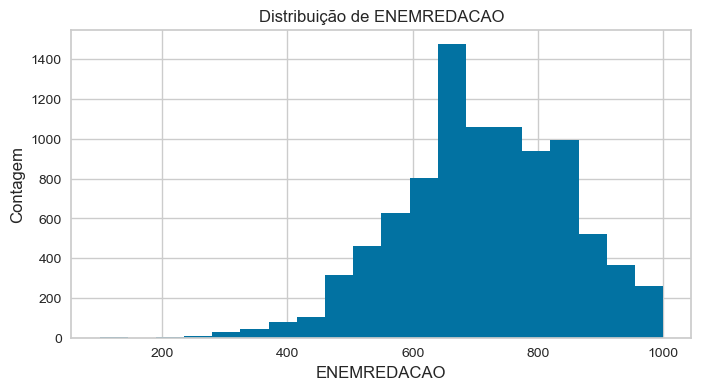

In [8]:
# Visualizar a distribuição de uma variável numérica (por exemplo, ENEMLINGUAGEM)
plt.figure(figsize=(8, 4))
plt.hist(df['ENEMREDACAO'], bins=20)
plt.xlabel('ENEMREDACAO')
plt.ylabel('Contagem')
plt.title('Distribuição de ENEMREDACAO')
plt.show()


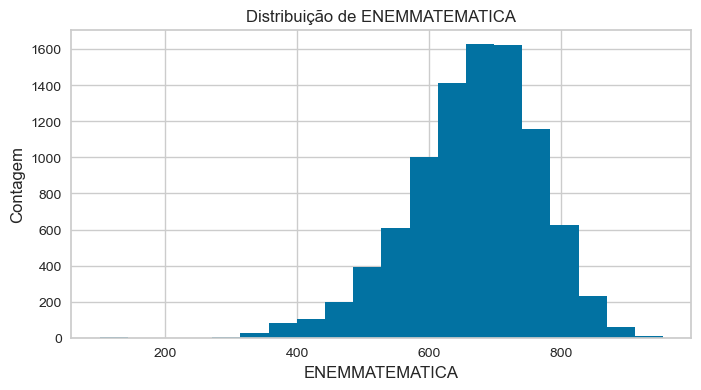

In [9]:
# Visualizar a distribuição de uma variável numérica (por exemplo, ENEMLINGUAGEM)
plt.figure(figsize=(8, 4))
plt.hist(df['ENEMMATEMATICA'], bins=20)
plt.xlabel('ENEMMATEMATICA')
plt.ylabel('Contagem')
plt.title('Distribuição de ENEMMATEMATICA')
plt.show()

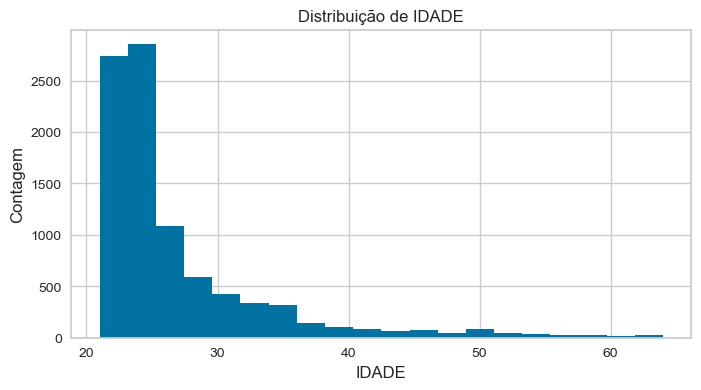

In [10]:
# Visualizar a distribuição de uma variável numérica (por exemplo, ENEMLINGUAGEM)
plt.figure(figsize=(8, 4))
plt.hist(df['IDADE'], bins=20)
plt.xlabel('IDADE')
plt.ylabel('Contagem')
plt.title('Distribuição de IDADE')
plt.show()

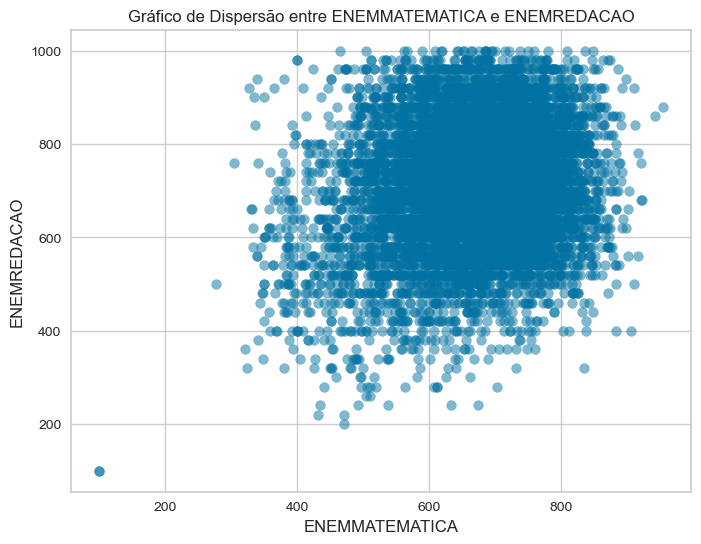

In [11]:
# Gráfico de dispersão entre "ENEMLINGUAGEM" e "ENEMHUMANAS"
plt.figure(figsize=(8, 6))
plt.scatter(df['ENEMMATEMATICA'], df['ENEMREDACAO'], alpha=0.5)
plt.xlabel('ENEMMATEMATICA')
plt.ylabel('ENEMREDACAO')
plt.title('Gráfico de Dispersão entre ENEMMATEMATICA e ENEMREDACAO')
plt.grid(True)
plt.show()


Exploração das Variáveis Categóricas

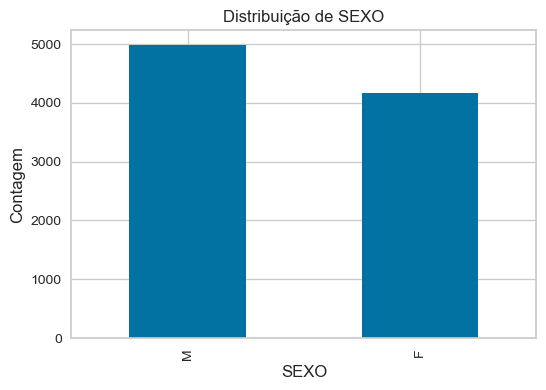

In [12]:
# Visualizar a distribuição de uma variável categórica (por exemplo, SEXO)
plt.figure(figsize=(6, 4))
df['SEXO'].value_counts().plot(kind='bar')
plt.xlabel('SEXO')
plt.ylabel('Contagem')
plt.title('Distribuição de SEXO')
plt.show()

Ciências Sociais Aplicadas        2615
Ciências Exatas e da Terra        2420
Ciências Humanas                  1701
Engenharias                       1185
Ciências Biológicas e da Saúde     657
Letras e Artes                     349
Farmácia                           148
Cinema e Audiovisual                69
Name: AREACURSO, dtype: int64
Ciências Sociais Aplicadas        0.285980
Ciências Exatas e da Terra        0.264654
Ciências Humanas                  0.186024
Engenharias                       0.129593
Ciências Biológicas e da Saúde    0.071850
Letras e Artes                    0.038167
Farmácia                          0.016185
Cinema e Audiovisual              0.007546
Name: AREACURSO, dtype: float64


Text(0, 0.5, 'Frequência')

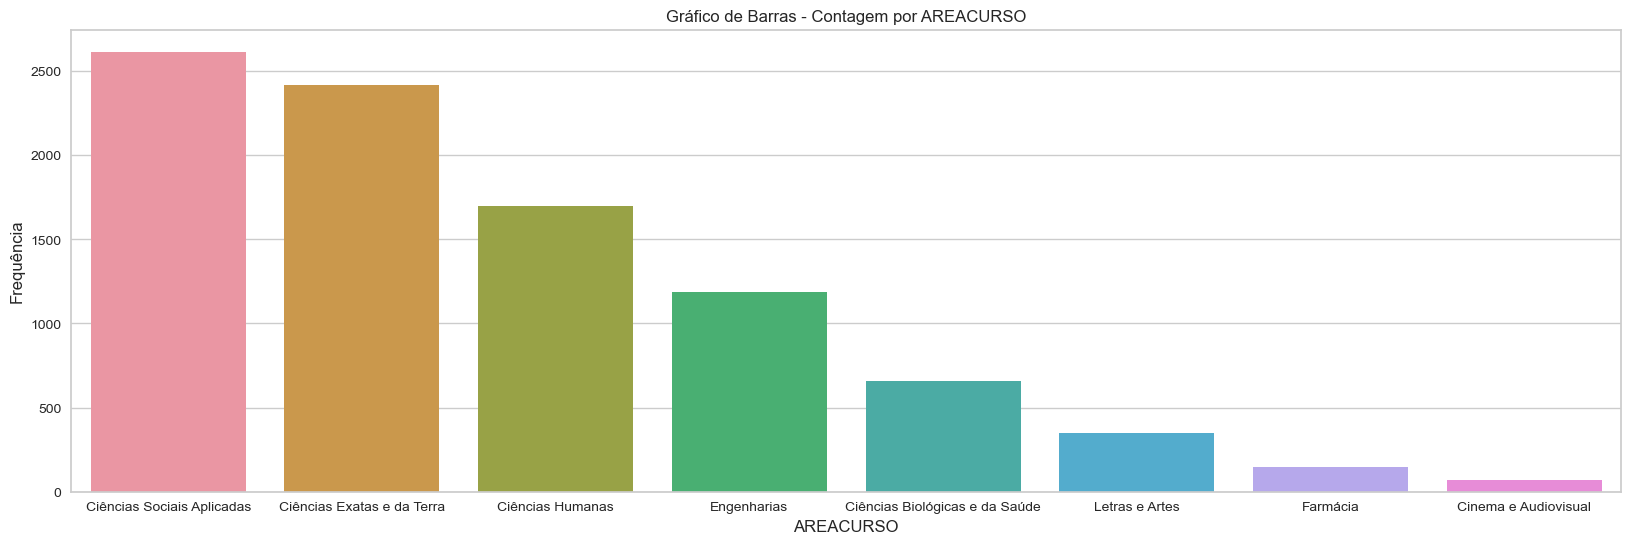

In [13]:
#Frequência Estado Civil
frequencia_areacurso = df['AREACURSO'].value_counts()
print(frequencia_areacurso)

#Proporção Estado Civil
proporcao_areacurso = df['AREACURSO'].value_counts(normalize=True)
print(proporcao_areacurso)

#Gráfico de Barras
plt.figure(figsize=(20, 6))
sns.barplot(x=frequencia_areacurso.index, y=frequencia_areacurso.values)
plt.title('Gráfico de Barras - Contagem por AREACURSO') #Adicionando título ao gráfico
plt.xlabel('AREACURSO') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

In [14]:
# Crie uma função para agrupar as categorias em "Exatas" ou "Humanas"
def agrupar_categorias(categoria):
    if categoria in ['Ciências Exatas e da Terra', 'Engenharias']:
        return 'Exatas'
    elif categoria in ['Ciências Sociais Aplicadas', 'Ciências Humanas']:
        return 'Humanas'
    else:
        return 'Outras'

# Aplique a função para criar uma nova coluna 'Grupo' no DataFrame
df['Grupo_area_curso'] = df['AREACURSO'].apply(agrupar_categorias)

# Visualize o DataFrame com a nova coluna 'Grupo'
print(df[['AREACURSO', 'Grupo_area_curso']])

# Use a função value_counts() para contar as ocorrências em cada grupo
contagem_por_grupo_area_curso = df['Grupo_area_curso'].value_counts()

# Exiba o resultado
print(contagem_por_grupo_area_curso)

                       AREACURSO Grupo_area_curso
0     Ciências Sociais Aplicadas          Humanas
1     Ciências Sociais Aplicadas          Humanas
2     Ciências Sociais Aplicadas          Humanas
3     Ciências Sociais Aplicadas          Humanas
4     Ciências Sociais Aplicadas          Humanas
...                          ...              ...
9139            Ciências Humanas          Humanas
9140            Ciências Humanas          Humanas
9141            Ciências Humanas          Humanas
9142            Ciências Humanas          Humanas
9143            Ciências Humanas          Humanas

[9144 rows x 2 columns]
Humanas    4316
Exatas     3605
Outras     1223
Name: Grupo_area_curso, dtype: int64


AC    7170
A1     531
L2     530
L4     506
L1     227
L3     180
Name: ACAOAFIRMATIVA, dtype: int64
AC    0.784121
A1    0.058071
L2    0.057962
L4    0.055337
L1    0.024825
L3    0.019685
Name: ACAOAFIRMATIVA, dtype: float64


Text(0, 0.5, 'Frequência')

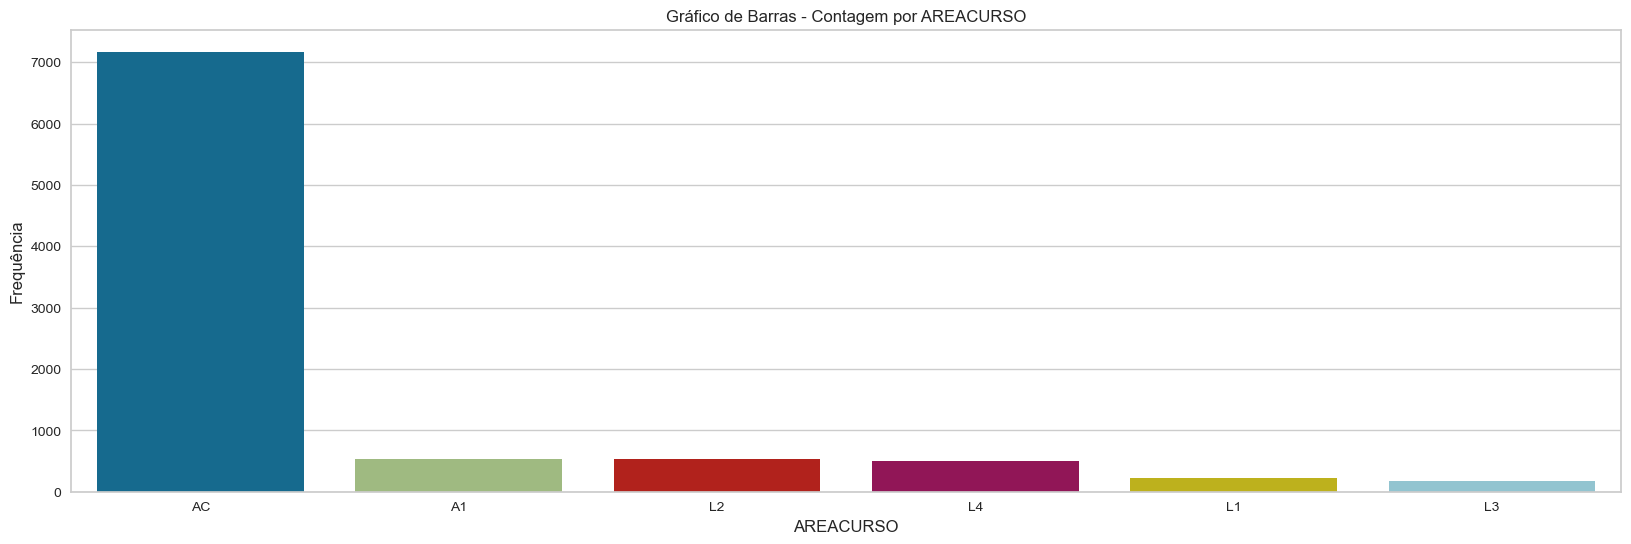

In [15]:
#Frequência Estado Civil
frequencia_areafirmativa = df['ACAOAFIRMATIVA'].value_counts()
print(frequencia_areafirmativa)

#Proporção Estado Civil
proporcao_areafirmativa = df['ACAOAFIRMATIVA'].value_counts(normalize=True)
print(proporcao_areafirmativa)

#Gráfico de Barras
plt.figure(figsize=(20, 6))
sns.barplot(x=frequencia_areafirmativa.index, y=frequencia_areafirmativa.values)
plt.title('Gráfico de Barras - Contagem por AREACURSO') #Adicionando título ao gráfico
plt.xlabel('AREACURSO') #Adicionando rótulos aos eixos
plt.ylabel('Frequência') #Adicionando rótulos aos eixos

Vamos criar dois grupos: "Ampla Concorrência" e "Ações Afirmativas". As categorias "Ampla Concorrência" incluiriam aquelas em que não há critérios específicos de renda ou etnia, enquanto as categorias "Ações Afirmativas" incluiriam aquelas que têm critérios específicos de renda, etnia ou deficiência. 

In [17]:
# Crie uma função para agrupar as categorias
def categorias_to_grupo(categoria):
    if categoria in ['AC', 'A0']:
        return 'Ampla Concorrência'
    else:
        return 'Ações Afirmativas'

# Aplique a função para criar uma nova coluna 'Grupo' no DataFrame
df['Grupo_criterio'] = df['ACAOAFIRMATIVA'].apply(categorias_to_grupo)

# Visualize o DataFrame com a nova coluna 'Grupo'
print(df[['ACAOAFIRMATIVA', 'Grupo_criterio']])

# Use a função value_counts() para contar as ocorrências em cada grupo
contagem_por_grupo_criterio = df['Grupo_criterio'].value_counts()

# Exiba o resultado
print(contagem_por_grupo_criterio)

     ACAOAFIRMATIVA      Grupo_criterio
0                AC  Ampla Concorrência
1                AC  Ampla Concorrência
2                AC  Ampla Concorrência
3                AC  Ampla Concorrência
4                AC  Ampla Concorrência
...             ...                 ...
9139             AC  Ampla Concorrência
9140             AC  Ampla Concorrência
9141             AC  Ampla Concorrência
9142             AC  Ampla Concorrência
9143             AC  Ampla Concorrência

[9144 rows x 2 columns]
Ampla Concorrência    7170
Ações Afirmativas     1974
Name: Grupo_criterio, dtype: int64


In [18]:
df

,Unnamed: 0,CODALUNO,ACAOAFIRMATIVA,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,CURSO,CODTURNOINGRESSO,...,TRANCAMENTOS,TEMPOPERMANENCIA,SEXO,STATUSFORMACAO,NOME_CURSO,cep_destino,AREACURSO,DISTANCIA_NUM,Grupo_area_curso,Grupo_criterio
0,0,112001032,AC,485.0,593.3,521.5,633.1,840.0,1,8,...,0,4,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,24210-590,Ciências Sociais Aplicadas,3.4,Humanas,Ampla Concorrência
1,1,112001035,AC,632.1,653.4,564.2,662.4,640.0,1,8,...,1,1,F,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,24210-590,Ciências Sociais Aplicadas,25.2,Humanas,Ampla Concorrência
2,2,112001037,AC,597.9,608.3,583.3,703.2,660.0,1,8,...,0,1,F,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,24210-590,Ciências Sociais Aplicadas,42.7,Humanas,Ampla Concorrência
3,3,112001039,AC,598.7,555.8,565.9,612.3,700.0,1,8,...,0,6,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,24210-590,Ciências Sociais Aplicadas,33.1,Humanas,Ampla Concorrência
4,4,112001048,AC,635.4,613.4,575.3,679.9,500.0,1,8,...,0,1,M,EVADIDO,BIBLIOTECONOMIA E DOCUMENTAÇÃO,24210-590,Ciências Sociais Aplicadas,2.4,Humanas,Ampla Concorrência
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,9139,214101016,AC,540.8,558.0,574.4,610.8,620.0,422,4,...,0,5,M,EVADIDO,GEOGRAFIA ( ANGRA DOS REIS),23914-360,Ciências Humanas,135.0,Humanas,Ampla Concorrência
9140,9140,214101025,AC,527.2,539.0,438.4,551.1,480.0,422,4,...,0,5,M,EVADIDO,GEOGRAFIA ( ANGRA DOS REIS),23914-360,Ciências Humanas,4.3,Humanas,Ampla Concorrência
9141,9141,214101026,AC,541.6,731.4,509.3,452.0,320.0,422,4,...,0,4,M,EVADIDO,GEOGRAFIA ( ANGRA DOS REIS),23914-360,Ciências Humanas,0.0,Humanas,Ampla Concorrência
9142,9142,214101032,AC,504.6,599.8,466.2,551.8,540.0,422,4,...,0,1,M,EVADIDO,GEOGRAFIA ( ANGRA DOS REIS),23914-360,Ciências Humanas,133.0,Humanas,Ampla Concorrência
